In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test=X_test.reshape(len(X_test), 100, 100, 3)
Y_test=Y_test.reshape(len(Y_test), 1)

X_train=X_train/255.0
X_test=X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [5]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

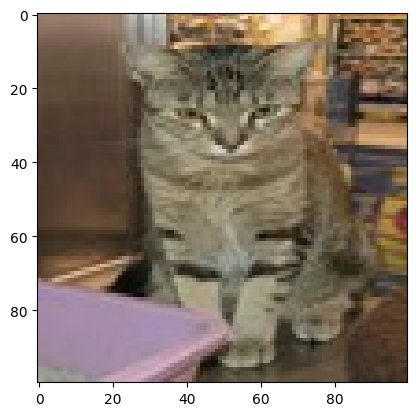

In [6]:
idx=random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [7]:
model=Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation ='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [8]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs=20, batch_size=64)

Epoch 1/20
32/32 [==============================] - 7s 194ms/step - loss: 0.6918 - accuracy: 0.5220
Epoch 2/20
32/32 [==============================] - 6s 200ms/step - loss: 0.6488 - accuracy: 0.6280
Epoch 3/20
32/32 [==============================] - 7s 214ms/step - loss: 0.6072 - accuracy: 0.6875
Epoch 4/20
32/32 [==============================] - 8s 238ms/step - loss: 0.5368 - accuracy: 0.7410
Epoch 5/20
32/32 [==============================] - 8s 237ms/step - loss: 0.4959 - accuracy: 0.7675
Epoch 6/20
32/32 [==============================] - 7s 233ms/step - loss: 0.4348 - accuracy: 0.8015
Epoch 7/20
32/32 [==============================] - 7s 232ms/step - loss: 0.3829 - accuracy: 0.8355
Epoch 8/20
32/32 [==============================] - 7s 233ms/step - loss: 0.3224 - accuracy: 0.8775
Epoch 9/20
32/32 [==============================] - 7s 234ms/step - loss: 0.3132 - accuracy: 0.8655
Epoch 10/20
32/32 [==============================] - 7s 234ms/step - loss: 0.2456 - accuracy: 0.9050

In [11]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 33ms/step - loss: 1.2508 - accuracy: 0.6800


[1.2507858276367188, 0.6800000071525574]

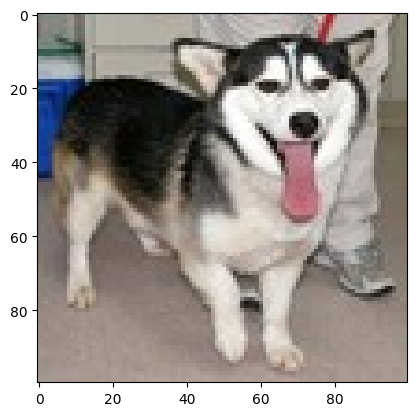

1/1 [==============================] - 0s 37ms/step
Our model says it is a : dog


In [16]:
idx2=random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred=model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print("Our model says it is a :", pred)